In [9]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('aps_failure_set.csv', na_values="na")

In [11]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


From a visual inspection of raw data it is obvious that some columns contain missing values. The first column named "class" is our target set (labels).

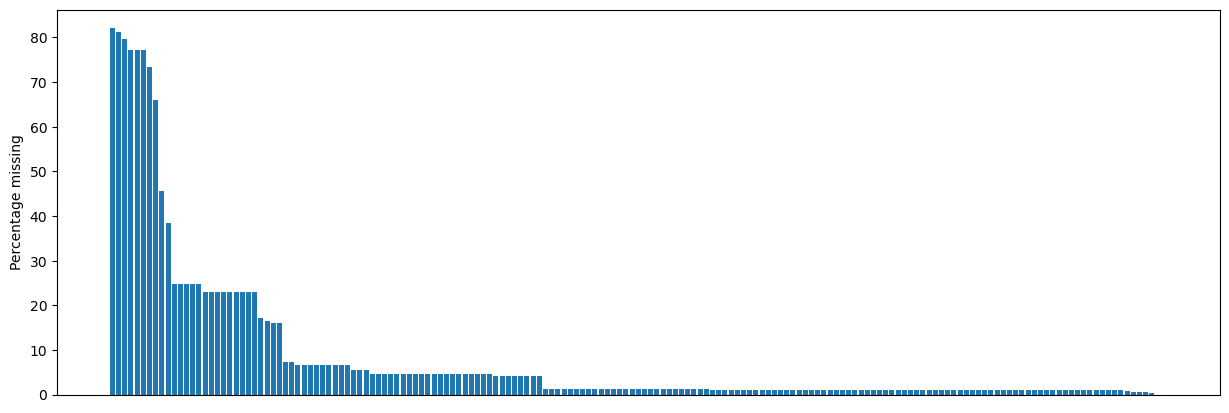

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

# calculating pct of missing values for each feature
missing = data.isna().sum().div(data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

Graph above shows that we have significant amount of missing data. I will drop columns containing more than 75% of missing values.

In [14]:
cols_missing = missing[missing[0]>75]
print("There are {} columns with NaNs above 75%.".format(len(cols_missing)))

There are 6 columns with NaNs above 75%.


In [15]:
cols_to_drop = list(cols_missing.index) # list with columns to drop
cols_to_drop.append('class')
cols_to_drop

['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'class']

Dealing with missing data

In [16]:
X = data.drop(cols_to_drop, axis=1)
y = data.loc[:,"class"]
y = pd.get_dummies(y).drop("neg",axis=1)

Remaining ones will be filledwith a mean.

In [18]:
X.fillna(X.mean(), inplace=True)

DATA STANDARISATION

 - I am going to use the Support Vector Machine Classifier. To work properly it requires standarisation of data.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

CREATING CUSTOM SCORER

Here I will create a custom scorer accoring to the challange guidelines. C=10FP + 500 FN. We can see that a cost for False Negative is much more than for False Positive.

https://www.kaggle.com/code/datark1/scania-aps-failures-a-pipeline-with-pca-and-ml